<a href="https://colab.research.google.com/github/hyeonjongChai/21FW/blob/main/LatentFactorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls "ml-100k"

README       u.genre      u.user       u2.test      u4.test      ua.test
allbut.pl    u.info       u1.base      u3.base      u5.base      ub.base
mku.sh       u.item       u1.test      u3.test      u5.test      ub.test
u.data       u.occupation u2.base      u4.base      ua.base


In [2]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [38]:
# 탭으로 구분됨.
train = pd.read_csv("ml-100k/ua.base", sep="\t", names=['user', 'item', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ua.test", sep="\t", names=['user', 'item', 'rating', 'timestamp'])

In [41]:
# 따로따로 불러오는 게 편함.
items = torch.LongTensor(train['item'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['item'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [61]:
X, Y, Y_test = [], [], []
lambdaP, lambdaQ = 0.0001, 0.0001
lambdaBU, lambdaBI = 0.0001, 0.0001
min_cost = 100

rank = 10 # 임의 지정
num_items = items.max() + 1
num_users = users.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True) # (rank, num_items)로 만들면 나중에 T해야함.(내적해야해서)

bias_user = torch.randn(num_users, requires_grad=True)
bias_item = torch.randn(num_items, requires_grad=True)

mean = torch.randn(1, requires_grad=True)

optimizer = torch.optim.Adam([P, Q, bias_user, bias_item, mean], lr= 0.1)

for epoch in range(10001):
    hypothesis = torch.sum(P[users] * Q[items], dim=1)\
                    + bias_user[users] + bias_item[items] + mean # [] 하단 참고
    mse = F.mse_loss(hypothesis ,ratings)
    cost = mse + lambdaP * (P**2).sum() + lambdaQ * (Q**2).sum()\
            + lambdaBU * (bias_user**2).sum() + lambdaBI * (bias_item**2).sum() # Regularization term
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    with torch.no_grad():
        
        X.append(epoch)
        Y.append(mse.item())
        
        hypothesis_test = torch.sum(P[users_test] * Q[items_test], dim=1)\
                            + bias_user[users_test] + bias_item[items_test] + mean
        mse_test = F.mse_loss(hypothesis_test ,ratings_test)
        Y_test.append(mse_test.item())
        
        if min_cost > mse_test.item(): min_cost = mse_test.item()
    
        if epoch % 100 == 0:
            print("epoch: {}, mse: {:.6f}, mse_test: {:.6f}".format(epoch, mse.item(), mse_test.item()))
print(f"Minimum Cost: {min_cost:.6f}")

epoch: 0, mse: 25.773037, mse_test: 22.209301
epoch: 100, mse: 0.627087, mse_test: 0.928550
epoch: 200, mse: 0.583289, mse_test: 0.884133
epoch: 300, mse: 0.575280, mse_test: 0.874981
epoch: 400, mse: 0.573129, mse_test: 0.871371
epoch: 500, mse: 0.572395, mse_test: 0.869281
epoch: 600, mse: 0.572093, mse_test: 0.868641
epoch: 700, mse: 0.571902, mse_test: 0.868656
epoch: 800, mse: 0.571756, mse_test: 0.868770
epoch: 900, mse: 0.571643, mse_test: 0.868794
epoch: 1000, mse: 0.571560, mse_test: 0.868743
epoch: 1100, mse: 0.571504, mse_test: 0.868692
epoch: 1200, mse: 0.571470, mse_test: 0.868665
epoch: 1300, mse: 0.571451, mse_test: 0.868650
epoch: 1400, mse: 0.571438, mse_test: 0.868640
epoch: 1500, mse: 0.571431, mse_test: 0.868633
epoch: 1600, mse: 0.571424, mse_test: 0.868634
epoch: 1700, mse: 0.571421, mse_test: 0.868636
epoch: 1800, mse: 0.571417, mse_test: 0.868642
epoch: 1900, mse: 0.571416, mse_test: 0.868652
epoch: 2000, mse: 0.571414, mse_test: 0.868665
epoch: 2100, mse: 0.571

In [60]:
X, Y, Y_test = [], [], []
lambdaP, lambdaQ = 0.0001, 0.0001
lambdaBU, lambdaBI = 0.0001, 0.0001
min_cost = 100

rank = 10 # 임의 지정
num_items = items.max() + 1
num_users = users.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True) # (rank, num_items)로 만들면 나중에 T해야함.(내적해야해서)

bias_user = torch.randn(num_users, requires_grad=True)
bias_item = torch.randn(num_items, requires_grad=True)

mean = torch.randn(1, requires_grad=True)

optimizer = torch.optim.Adam([P, Q, bias_user, bias_item, mean], lr= 0.01)

for epoch in range(10001):
    hypothesis = torch.sum(P[users] * Q[items], dim=1)\
                    + bias_user[users] + bias_item[items] + mean # [] 하단 참고
    mse = F.mse_loss(hypothesis ,ratings)
    cost = mse + lambdaP * (P**2).sum() + lambdaQ * (Q**2).sum()\
            + lambdaBU * (bias_user**2).sum() + lambdaBI * (bias_item**2).sum() # Regularization term
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    with torch.no_grad():
        
        X.append(epoch)
        Y.append(mse.item())
        
        hypothesis_test = torch.sum(P[users_test] * Q[items_test], dim=1)\
                            + bias_user[users_test] + bias_item[items_test] + mean
        mse_test = F.mse_loss(hypothesis_test ,ratings_test)
        Y_test.append(mse_test.item())
    
        if min_cost > mse_test.item(): min_cost = mse_test.item()


        if epoch % 100 == 0:
            print("epoch: {}, mse: {:.6f}, mse_test: {:.6f}".format(epoch, mse.item(), mse_test.item()))
            
print(f"Minimum Cost: {min_cost:.6f}")

epoch: 0, mse: 27.133659, mse_test: 26.872066
epoch: 100, mse: 2.655046, mse_test: 3.598856
epoch: 200, mse: 1.069182, mse_test: 1.513416
epoch: 300, mse: 0.866477, mse_test: 1.223683
epoch: 400, mse: 0.785939, mse_test: 1.123628
epoch: 500, mse: 0.734841, mse_test: 1.069474
epoch: 600, mse: 0.699724, mse_test: 1.034840
epoch: 700, mse: 0.674178, mse_test: 1.011254
epoch: 800, mse: 0.654551, mse_test: 0.993297
epoch: 900, mse: 0.639264, mse_test: 0.978444
epoch: 1000, mse: 0.627062, mse_test: 0.965477
epoch: 1100, mse: 0.616981, mse_test: 0.953697
epoch: 1200, mse: 0.608512, mse_test: 0.942720
epoch: 1300, mse: 0.601466, mse_test: 0.932391
epoch: 1400, mse: 0.595708, mse_test: 0.922738
epoch: 1500, mse: 0.591051, mse_test: 0.913917
epoch: 1600, mse: 0.587321, mse_test: 0.906128
epoch: 1700, mse: 0.584372, mse_test: 0.899504
epoch: 1800, mse: 0.582055, mse_test: 0.894035
epoch: 1900, mse: 0.580216, mse_test: 0.889569
epoch: 2000, mse: 0.578717, mse_test: 0.885890
epoch: 2100, mse: 0.577

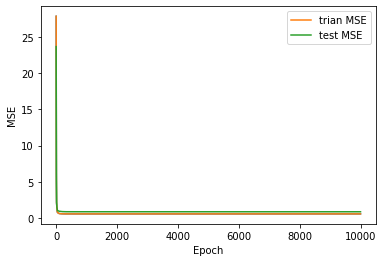

In [56]:
plt.plot(X, Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X, Y, label = "trian MSE")
plt.plot(X, Y_test, label = "test MSE")

plt.legend()
plt.show()

# Overfitting 발생 -> Regularization, Baseline estimation

In [ ]:
a = torch.Tensor([[1,2,3], 
                  [4,5,6], 
                  [7,8,9]])
b = torch.LongTensor([0,1,1,2,0])

a[b]